In [ ]:
# def load_data(file_name):
#     with open(file_name, 'r') as file:
#         num_variables = int(file.readline().strip())
#         function_expression = file.readline().strip()
#         num_intervals = int(file.readline().strip())
#         intervals = [list(map(float, line.split())) for line in file.readlines()]

#     return num_variables, function_expression, num_intervals, intervals
# # żeby czytało postać funkcji z pliku a nie z casów jak def funkcje poniżej

In [48]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import re

def funkcje(numer):
    funkcje_mapping = {
        1: "5 * X1**3 - 2 * X1**2 + 3 * X1 - 17",
        2: "math.sin(X1) + math.cos(X1)",
        3: "2 * math.log(X1 + 1)",
        4: "X1 + 2 * X2",
        5: "math.sin(X1 / 2) + 2 * math.cos(X1)",
        6: "X1**2 + 3 * X1 * X2 - 7 * X2 + 1",
    }
    return funkcje_mapping.get(numer, "")

def wyznaczanie_numeru_funkcji(nazwa_pliku):
    match = re.search(r"fun(\d+)", nazwa_pliku)
    return int(match.group(1)) if match else 0

def wyznaczanie_numeru_dziedziny(nazwa_pliku):
    match = re.search(r"dzi(\d+)", nazwa_pliku)
    return int(match.group(1)) if match else 0

def wyznaczanie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-2] == "pi":
        return -3.14, 3.14
    return tabela[-3], tabela[-2]

def wyznaczanie_kroku_funkcji(nazwa_pliku):
    match = re.search(r"(\d+(\.\d+)?)\.dat$", nazwa_pliku)
    return float(match.group(1)) if match else 0.1

def plotowanie_jednoargumentowe(p, k, funkcja, nr_funkcji, krok):
    x_axis, y_axis, y_original = [], [], []
    # krok = wyznaczanie_kroku_funkcji()
    i, koniec = round(float(p),2), round(float(k),2)
    funkcja_original = funkcje(nr_funkcji)

    sin = math.sin
    cos = math.cos
    math.sin = math.sin
    math.cos = math.cos
    print(funkcja_original)
    print(funkcja)
    while i < koniec:
        X1 = i 
        # print(X1)
        if i<0.0001 and i>-0.0001: 
            print("Przypadek: ", i, X1, krok)
            X1 = i+krok
            # print("Przypadek: ", i, X1)
        # y_axis.append(eval(funkcja))
        # y_original.append(eval(funkcja_original))
        try:
            y_axis.append(eval(funkcja))
        except ZeroDivisionError:
            y_axis.append(float(0))
        try:
            y_original.append(eval(funkcja_original))
        except ZeroDivisionError:
            y_original.append(float(0))
        x_axis.append(i)
        i += krok

    return x_axis, y_axis, y_original

def wypisz_funkcje_jednoargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()

    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")
        poczatek, koniec = wyznaczanie_przedzialow(nazwa_pliku)
        krok = wyznaczanie_kroku_funkcji(nazwa_pliku)
        print("Krok: ", krok)
        print("Początek: ", poczatek, " , Koniec: ", koniec)
        x, y_gp, y_original = plotowanie_jednoargumentowe(poczatek, koniec, zawartosc, nr_funkcji, krok)

        plt.grid(True)
        plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
        plt.scatter(x, y_original, color='orange', label='Proper', s=10)
        plt.xlabel('Oś X')
        plt.ylabel('Oś Y')
        plt.legend()
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def plotowanie_dwuargumentowe(p, k, funkcja, nr_funkcji, nr_dziedziny, krok):
    x1_axis, x2_axis, y_axis, y_original = [], [], [], []
    # krok = wyznaczanie_kroku_funkcji(nr_funkcji)
    funkcja_original = funkcje(nr_funkcji)
    i, koniec = int(p), int(k)
    
    sin = math.sin
    cos = math.cos
    math.sin = math.sin
    math.cos = math.cos
    while i < koniec:
        j = int(p)
        X1 = i if i != 0 else i+krok
        while j < koniec:
            X2 = j if j != 0 else j+krok
            try:
                y_axis.append(eval(funkcja))
                y_original.append(eval(funkcja_original))
            except ZeroDivisionError:
                y_axis.append(float('nan'))
                y_original.append(float('nan'))
            x1_axis.append(i)
            x2_axis.append(j)
            j += krok
        i += krok
    
    return x1_axis, x2_axis, y_axis, y_original

def wypisz_funkcje_dwuargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")
        poczatek, koniec = wyznaczanie_przedzialow(nazwa_pliku)
        nr_dziedziny = int(wyznaczanie_numeru_dziedziny(nazwa_pliku))
        krok = wyznaczanie_kroku_funkcji(nazwa_pliku)
        print("Krok: ", krok)
        x1, x2, y, y_original = plotowanie_dwuargumentowe(poczatek, koniec, zawartosc, nr_funkcji, nr_dziedziny, krok)
        size = 5
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

        ax[0].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[0].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)

        ax[0].set_xlabel('X1')
        ax[0].set_ylabel('X2')
        ax[0].set_zlabel('Y')
        ax[0].legend()

        ax[1].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[1].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)
        ax[1].view_init(elev=30, azim=45)
        ax[1].text2D(0.05, 0.95, "Rzut z boku", transform=ax[1].transAxes)

        ax[1].set_xlabel('X1')
        ax[1].set_ylabel('X2')
        ax[1].set_zlabel('Y')
        ax[1].legend()

        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def znajdz_pliki_done(folder, pattern):
    pliki_done = []
    folder_done = os.path.join(folder, "filesAutomated", "done")
    folder_img = os.path.join(folder, "filesAutomated", "img")

    for plik in os.listdir(folder_done):
        if plik.startswith(pattern) and plik.endswith(".dat"):
            pelna_sciezka = os.path.join(folder_done, plik)
            nr_funkcji = wyznaczanie_numeru_funkcji(plik)
            print("Funkcja: ", nr_funkcji)
            if nr_funkcji < 4:
                nazwa = wypisz_funkcje_jednoargumentowa(pelna_sciezka, folder_img, nr_funkcji)
            else:
                nazwa = wypisz_funkcje_dwuargumentowa(pelna_sciezka, folder_img, nr_funkcji)

    return pliki_done

Funkcja:  6
Krok:  0.2


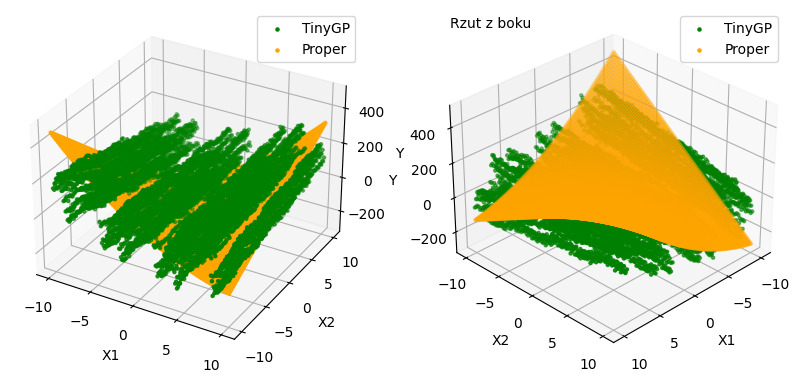

Funkcja:  6


In [53]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
pliki_done = znajdz_pliki_done(folder_glowny, "done lab1fun6")